In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import f

In [2]:
df = pd.read_csv('conjunto_de_datos_tmodulo_enut_2019.csv',encoding='latin-1')
df_nuevo = df[['EDAD_V','SEXO','NIV','P5_1','P5_3_1','P5_3_2','P5_3_3','P5_3_4','P5_6_6','P5_7','P5_7A']]

In [3]:
df_nuevo['P5_3_1'] = df_nuevo['P5_3_1'].replace({np.nan: '0'})
df_nuevo['P5_3_2'] = df_nuevo['P5_3_2'].replace({np.nan: '0'})
df_nuevo['P5_3_3'] = df_nuevo['P5_3_3'].replace({np.nan: '0'})
df_nuevo['P5_3_4'] = df_nuevo['P5_3_4'].replace({np.nan: '0'})
df_nuevo['P5_7'] = df_nuevo['P5_7'].replace({np.nan: '0'})
df_nuevo['P5_7'] = df_nuevo['P5_7'].replace({'99999': '0'})
df_nuevo['P5_7A'] = df_nuevo['P5_7A'].replace({np.nan: '-1'})
df_nuevo['P5_3_1'] = df_nuevo['P5_3_1'].astype(int)
df_nuevo['P5_3_2'] = df_nuevo['P5_3_2'].astype(int)
df_nuevo['P5_3_3'] = df_nuevo['P5_3_3'].astype(int)
df_nuevo['P5_3_4'] = df_nuevo['P5_3_4'].astype(int)
df_nuevo['P5_7'] = df_nuevo['P5_7'].astype(float)
df_nuevo['P5_7A'] = df_nuevo['P5_7A'].astype(int)
df_nuevo['tot_horas'] = df_nuevo['P5_3_1'] + df_nuevo['P5_3_3']
df_nuevo['tot_minutos'] = df_nuevo['P5_3_2'] + df_nuevo['P5_3_4']
df_nuevo['tot_horas'] = df_nuevo['tot_horas'] + (df_nuevo['tot_minutos']/60)

C:\Users\Miguel\AppData\Local\Temp/ipykernel_22312/1619613471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['P5_3_1'] = df_nuevo['P5_3_1'].replace({np.nan: '0'})
C:\Users\Miguel\AppData\Local\Temp/ipykernel_22312/1619613471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['P5_3_2'] = df_nuevo['P5_3_2'].replace({np.nan: '0'})
C:\Users\Miguel\AppData\Local\Temp/ipykernel_22312/1619613471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [4]:
df_nuevo = df_nuevo.loc[df_nuevo['P5_7'] > 0]
df_nuevo = df_nuevo.loc[df_nuevo['P5_7A'] > 0]
df_nuevo = df_nuevo.loc[df_nuevo['EDAD_V'] >= 15]
df_nuevo = df_nuevo.loc[df_nuevo['P5_1'] == 1]
df_nuevo

,EDAD_V,SEXO,NIV,P5_1,P5_3_1,P5_3_2,P5_3_3,P5_3_4,P5_6_6,P5_7,P5_7A,tot_horas,tot_minutos
2,30,1,6,1,40,0,20,0,1.0,8300.0,3,60.0,0
3,25,1,3,1,55,0,0,0,1.0,4000.0,2,55.0,0
5,48,2,7,1,40,0,5,0,2.0,6000.0,3,45.0,0
6,26,1,8,1,40,0,0,0,2.0,8000.0,3,40.0,0
9,50,1,2,1,55,0,0,0,2.0,900.0,1,55.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71397,44,2,3,1,25,0,0,0,2.0,400.0,1,25.0,0
71400,31,1,8,1,60,0,24,0,1.0,15000.0,3,84.0,0
71401,23,2,6,1,40,0,8,0,2.0,2400.0,1,48.0,0
71402,27,1,6,1,30,0,5,0,2.0,1800.0,1,35.0,0


In [5]:
def agregaColFrecPago(df):
    res = []
    for x in df:
        if x == 1:
            res.append(52)
        else:
            if x == 2:
                res.append(26)
            else:
                if x == 3:
                    res.append(12)
                else:
                    res.append(1)
    
    return res
x = agregaColFrecPago(df_nuevo['P5_7A'])
df_nuevo['semanal'] = ((x * df_nuevo['P5_7'])/48)
df_nuevo['ganancia_hora'] = df_nuevo['semanal']/df_nuevo['tot_horas']
df_limitado = df_nuevo.loc[df_nuevo['ganancia_hora'] <= 500]
df_limitado = df_limitado.loc[df_limitado['tot_horas'] <= 90]
df_limitado

,EDAD_V,SEXO,NIV,P5_1,P5_3_1,P5_3_2,P5_3_3,P5_3_4,P5_6_6,P5_7,P5_7A,tot_horas,tot_minutos,semanal,ganancia_hora
2,30,1,6,1,40,0,20,0,1.0,8300.0,3,60.0,0,2075.000000,34.583333
3,25,1,3,1,55,0,0,0,1.0,4000.0,2,55.0,0,2166.666667,39.393939
5,48,2,7,1,40,0,5,0,2.0,6000.0,3,45.0,0,1500.000000,33.333333
6,26,1,8,1,40,0,0,0,2.0,8000.0,3,40.0,0,2000.000000,50.000000
9,50,1,2,1,55,0,0,0,2.0,900.0,1,55.0,0,975.000000,17.727273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71397,44,2,3,1,25,0,0,0,2.0,400.0,1,25.0,0,433.333333,17.333333
71400,31,1,8,1,60,0,24,0,1.0,15000.0,3,84.0,0,3750.000000,44.642857
71401,23,2,6,1,40,0,8,0,2.0,2400.0,1,48.0,0,2600.000000,54.166667
71402,27,1,6,1,30,0,5,0,2.0,1800.0,1,35.0,0,1950.000000,55.714286


## Metodos para agrupamiento de datos

In [6]:
def grupos(df,minimo,maximo,num_grupos):
    minimo = minimo - 1
    maximo = maximo + 1
    dif = maximo - minimo
    tam_grupo = dif/num_grupos
    res = []
    for x in df:
        y = x - minimo
        y = int(y/tam_grupo)
        res.append(y)
    return res

def imprimeGrupo(minimo,maximo,num_grupos):
    minimo = minimo - 1
    maximo = maximo + 1
    dif = maximo - minimo
    tam_grupo = dif/num_grupos
    for i in range(num_grupos):
        st = 'grupo '
        x = minimo + i * tam_grupo
        y = minimo + (i + 1) * tam_grupo
        print('grupo ' + str(i) + ': (' + str(x) + ',' + str(y) +']')

## Metodos para varianza y cosas extra

In [7]:
def s2df(df):
    
    n = len(df)
    media = np.mean(df)
    s2 = df - media
    s2 = np.dot(s2,s2)
    s2 = s2 / (n-1)
    
    return s2

def arrInterConfianza(metodo,arr,alfa):
    res = []
    for x in arr:
        
        res.append(metodo(x,alfa))
        
    return res

def arrEstimador(metodo,vec,col):
    res = []
    for x in vec:
        res.append(metodo(x[col]))
        
    return res

def pow_n(a):
    res = pow(a,1/2)
    
    return res

## Metodos para intervalos de confianza

In [8]:
def intervaloDeConfVarDesc(df,alfa):
    
    res = []
    n = len(df)
    grados_de_libertad = n - 1
    media = np.mean(df)
    s2 = s2df(df)
    res_t = t.ppf(1-alfa/2, df=grados_de_libertad)
    sn = s2 / n
    sn = pow(sn,1/2)
    res.append((media - sn * res_t))
    res.append((media + sn * res_t))
    
    return res

def intervaloDeConfDifMedias(x,alfa):
    
    res = []
    df_1 = x[0]
    df_2 = x[1]
    n1 = len(df_1)
    n2 = len(df_2)
    grados_de_libertad = n1 + n2 - 2
    media1 = np.mean(df_1)
    media2 = np.mean(df_2)
    dif = media1 - media2
    s21 = s2df(df_1)
    s22 = s2df(df_2)
    s1 = pow(s21,1/2)
    s2 = pow(s22,1/2)
    s2p = (((n1-1) * s21) + ((n2-1) * s22))/grados_de_libertad
    sp = pow(s2p,1/2)
    rn = (1/n1) + (1/n2)
    rn = pow(rn,1/2)
    res_t = t.ppf(1-alfa/2, df=grados_de_libertad)
    res.append((dif - res_t * sp * rn))
    res.append((dif + res_t * sp * rn))
    
    return res

def intervaloDeConfCocienteDeVar(vec,alfa):
    
    res = []
    
    df_1 = vec[0]
    df_2 = vec[1]
    
    n1 = len(df_1)
    n2 = len(df_2)
    
    s21 = s2df(df_1)
    s22 = s2df(df_2)
    
    f_res_sup = f.ppf(1-(alfa/2),n1-1,n2-1)
    
    f_res_inf = f.ppf(1-(alfa/2),n2-1,n1-1)
    f_res_inf = 1/f_res_inf
    
    cociente = s22/s21
    
    res.append(f_res_inf * cociente)
    res.append(f_res_sup * cociente)
    
    return res

## Metodos para pruebas de hipotesis

In [9]:
def pruebaDeHipotesisDifMediaInferior(h0,vec,alfa):
    
    df_0 = vec[0]
    df_1 = vec[1]
    
    media_0 = np.mean(df_0)
    media_1 = np.mean(df_1)
    
    n0 = len(df_0)
    n1 = len(df_1)
    
    s2_0 = s2df(df_0)
    s2_1 = s2df(df_1)
    
    dif = media_0 - media_1
    grados_de_libertad = n0 - n1 - 2
    
    sp2 = ((n0-1) * s2_0 + (n1-1) * s2_1)/grados_de_libertad
    sp = pow(sp2,1/2)
    
    nr2 = (1/n0) + (1/n1)
    nr = pow(nr2,1/2)
    
    t_res = t.ppf(alfa, df=grados_de_libertad)
    
    c = (t_res * nr * sp) + h0
    
    res_t = t.ppf(1-alfa/2, df=grados_de_libertad)
    
    return c,dif,c>dif

def pruebaDeHipotesisSuperior(h0,vec,alfa):
    
    media = np.mean(vec) 
    n = len(vec)    
    s2 = s2df(vec)    
    grados_de_libertad = n - 1
    s2n = s2/n
    sn = pow(s2n,1/2)
    
    t_res = t.ppf(1-alfa, df=grados_de_libertad)
    
    c = (t_res * sn) + h0
    
    return c,media,c<media


def pruebaDeHipotesisDifMediaSuperior(h0,vec,alfa):
    
    df_0 = vec[0]
    df_1 = vec[1]
    
    media_0 = np.mean(df_0)
    media_1 = np.mean(df_1)
    
    n0 = len(df_0)
    n1 = len(df_1)
    
    s2_0 = s2df(df_0)
    s2_1 = s2df(df_1)
    
    dif = media_0 - media_1
    grados_de_libertad = n0 - n1 - 2
    
    sp2 = ((n0-1) * s2_0 + (n1-1) * s2_1)/grados_de_libertad
    sp = pow(sp2,1/2)
    
    nr2 = (1/n0) + (1/n1)
    nr = pow(nr2,1/2)
    
    t_res = t.ppf(1-alfa, df=grados_de_libertad)
    
    c = (t_res * nr * sp) + h0
    
    return c,dif,c<dif

def beta(vec,punto_critico,ha):
    df_0 = vec[0]
    df_1 = vec[1]  
    
    n0 = len(df_0)
    n1 = len(df_1)
    
    s2_0 = s2df(df_0)
    s2_1 = s2df(df_1)
    
    grados_de_libertad = n0 - n1 - 2
    
    arriba = punto_critico - ha
    
    sp2 = ((n0-1) * s2_0 + (n1-1) * s2_1)/grados_de_libertad
    sp = pow(sp2,1/2)
    
    nr2 = (1/n0) + (1/n1)
    nr = pow(nr2,1/2)
    
    res = arriba/(sp*nr)
    
    t_res = t.cdf(res, df=grados_de_libertad)
    
    return t_res

def aceptar_o_rechazar_h0(b, alfa):
    
    if b :
        print('Hay evidencia suficiente para rechazar h0, con una confiabilidad del ' + str(1-alfa))
        
    else:
        print('No hay evidencia suficiente para rechazar h0, con una confiabilidad del ' + str(1-alfa))

### Agregar grupos de horas e ingreso por hora

In [10]:
minimo = min(df_limitado['tot_horas'])
maximo = max(df_limitado['tot_horas'])
num_grupo = 15
df_limitado['grupo_horas'] = grupos(df_limitado['tot_horas'],minimo,maximo,num_grupo)
print('grupos de horas')
#imprimeGrupo(minimo,maximo,num_grupo)
print('-------------------------------------------------------------------')
minimo = min(df_limitado['ganancia_hora'])
maximo = max(df_limitado['ganancia_hora'])
num_grupo = 40
df_limitado['grupo_ganancia_hora'] = grupos(df_limitado['ganancia_hora'],minimo,maximo,num_grupo)
#df_nuevo['grupo_ganancia_hora'] = grupos(df_nuevo['ganancia_hora'],minimo,maximo,num_grupo)
print('grupos de ganacia por hora')
#imprimeGrupo(minimo,maximo,num_grupo)

grupos de horas
-------------------------------------------------------------------
grupos de ganacia por hora


# DF a utilizar para las graficas

Separar la poblacion en niveles educativos (NIV) \
0 es sin educación \
1-3 básica \
4-6 media \
7-8 superior 

In [11]:
df_nula = df_limitado.loc[df_limitado['NIV'] == 0]
#df_nula = df_nuevo.loc[df_nuevo['NIV'] == 0]
df_basica = df_limitado.loc[df_limitado['NIV'] > 0]
#df_basica = df_nuevo.loc[df_nuevo['NIV'] > 0]
df_basica = df_basica.loc[df_basica['NIV'] < 4]
df_media = df_limitado.loc[df_limitado['NIV'] > 3]
df_media = df_media.loc[df_media['NIV'] < 8]
df_superior = df_limitado.loc[df_limitado['NIV'] > 7]
df_limitado

,EDAD_V,SEXO,NIV,P5_1,P5_3_1,P5_3_2,P5_3_3,P5_3_4,P5_6_6,P5_7,P5_7A,tot_horas,tot_minutos,semanal,ganancia_hora,grupo_horas,grupo_ganancia_hora
2,30,1,6,1,40,0,20,0,1.0,8300.0,3,60.0,0,2075.000000,34.583333,8,2
3,25,1,3,1,55,0,0,0,1.0,4000.0,2,55.0,0,2166.666667,39.393939,8,2
5,48,2,7,1,40,0,5,0,2.0,6000.0,3,45.0,0,1500.000000,33.333333,6,2
6,26,1,8,1,40,0,0,0,2.0,8000.0,3,40.0,0,2000.000000,50.000000,5,3
9,50,1,2,1,55,0,0,0,2.0,900.0,1,55.0,0,975.000000,17.727273,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71397,44,2,3,1,25,0,0,0,2.0,400.0,1,25.0,0,433.333333,17.333333,3,1
71400,31,1,8,1,60,0,24,0,1.0,15000.0,3,84.0,0,3750.000000,44.642857,12,3
71401,23,2,6,1,40,0,8,0,2.0,2400.0,1,48.0,0,2600.000000,54.166667,7,3
71402,27,1,6,1,30,0,5,0,2.0,1800.0,1,35.0,0,1950.000000,55.714286,5,3


### Licenciatura vs maestria doctorado

In [12]:
df_licenciatura = df_superior.loc[df_superior['NIV'] == 8]
df_maestria_doctorado = df_superior.loc[df_superior['NIV'] == 9]

### Hombres vs mujeres

In [13]:
df_hombres = df_limitado.loc[df_limitado['SEXO'] == 1]
df_mujeres = df_limitado.loc[df_limitado['SEXO'] == 2]

### Formal vs informal

In [14]:
df_formal = df_limitado.loc[df_limitado['P5_6_6'] == 1]
df_informal = df_limitado.loc[df_limitado['P5_6_6'] == 2]

## Nivel educativo

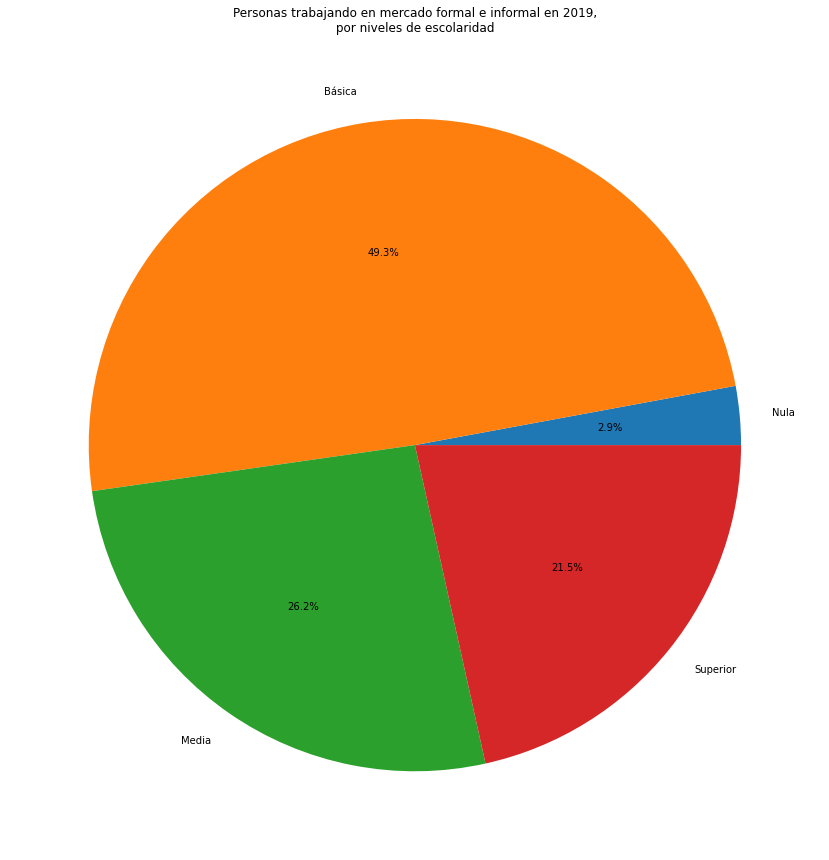

In [15]:
tot_muestra = len(df_limitado)
tot_nula = len(df_nula)
tot_basica = len(df_basica)
tot_media = len(df_media)
tot_superior = len(df_superior)

arr_pie = [tot_nula/tot_muestra,tot_basica/tot_muestra,tot_media/tot_muestra,tot_superior/tot_muestra]
mylabels = ['Nula','Básica','Media','Superior']
plt.figure(figsize=(15,15))
plt.title("Personas trabajando en mercado formal e informal en 2019,\n por niveles de escolaridad ")
plt.pie(arr_pie,labels = mylabels, autopct='%1.1f%%')
plt.show()

<BarContainer object of 15 artists>

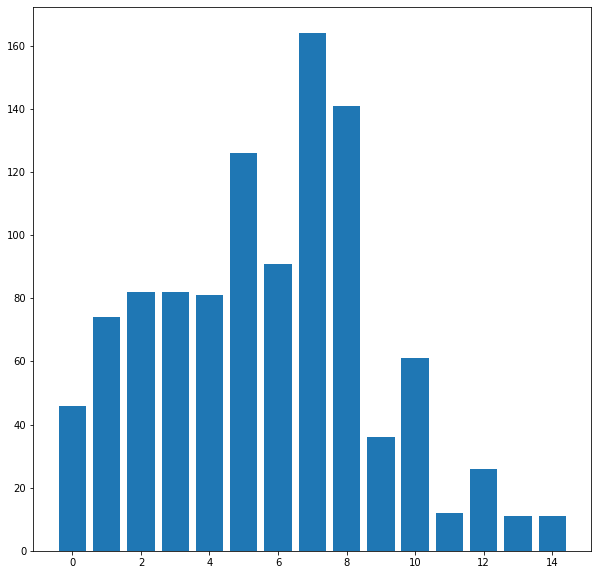

In [16]:
y = df_nula['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.figure(figsize=(10,10))
plt.bar(x,y)

<BarContainer object of 427 artists>

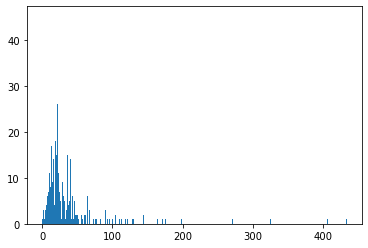

In [77]:
y = df_nula['ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 19 artists>

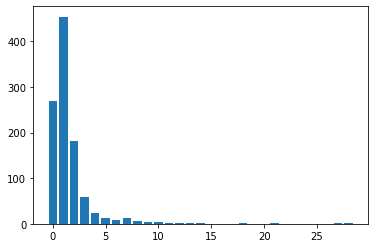

In [17]:
y = df_nula['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 15 artists>

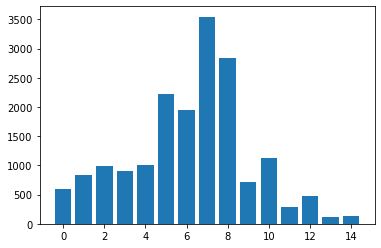

In [18]:
y = df_basica['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 35 artists>

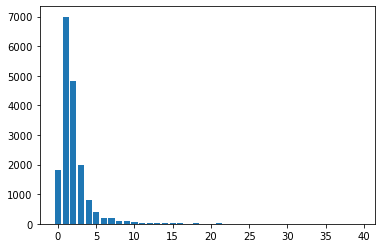

In [19]:
y = df_basica['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 47 artists>

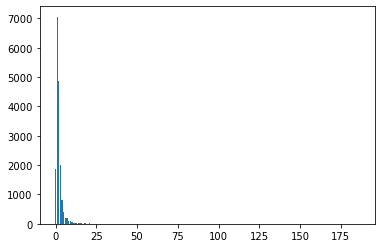

In [78]:
df_nuevo['grupo_ganancia_hora'] = grupos(df_nuevo['ganancia_hora'],minimo,maximo,num_grupo)
df_basica = df_nuevo.loc[df_nuevo['NIV'] > 0]
df_basica = df_basica.loc[df_basica['NIV'] < 4]
y = df_basica['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 15 artists>

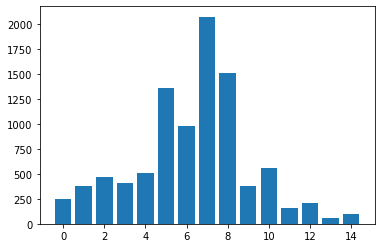

In [21]:
y = df_media['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 34 artists>

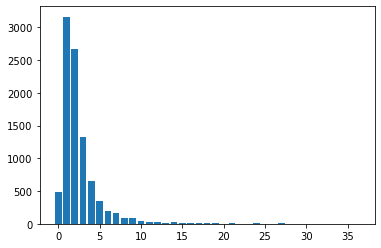

In [22]:
y = df_media['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 15 artists>

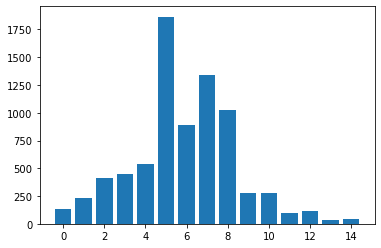

In [23]:
y = df_superior['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 37 artists>

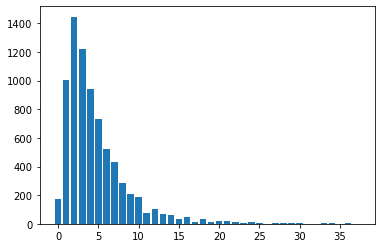

In [24]:
y = df_superior['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

## Licenciatura vs maestria y doctorado

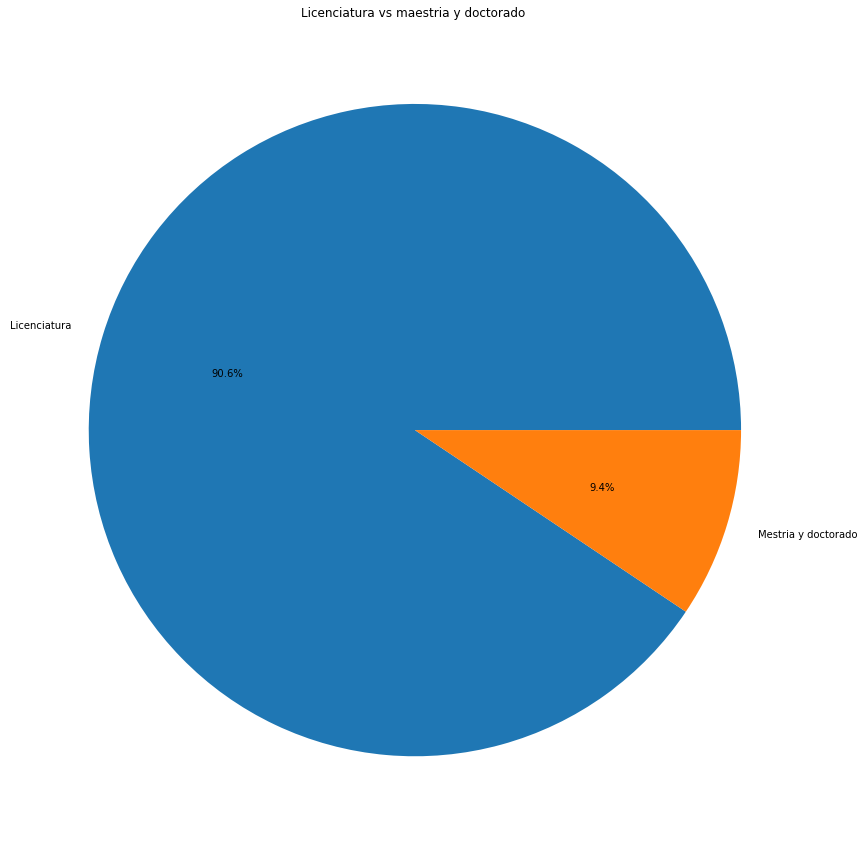

In [25]:
tot_licenciatura = len(df_licenciatura)
tot_mestria_doctorado = len(df_maestria_doctorado)
arr_pie = [tot_licenciatura/tot_superior,tot_mestria_doctorado/tot_superior]
mylabels = ['Licenciatura','Mestria y doctorado']

plt.figure(figsize=(15,15))
plt.title("Licenciatura vs maestria y doctorado ")
plt.pie(arr_pie,labels = mylabels, autopct='%1.1f%%')
plt.show()

<BarContainer object of 15 artists>

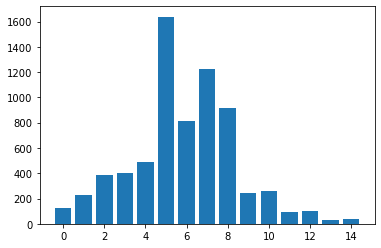

In [26]:
y = df_licenciatura['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 36 artists>

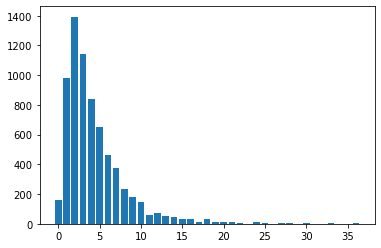

In [27]:
y = df_licenciatura['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 15 artists>

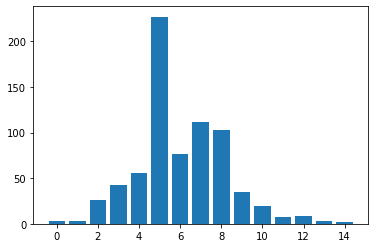

In [28]:
y = df_maestria_doctorado['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 35 artists>

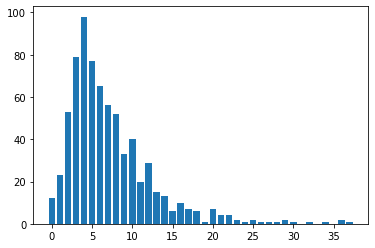

In [29]:
y = df_maestria_doctorado['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

## Hombres vs mujeres

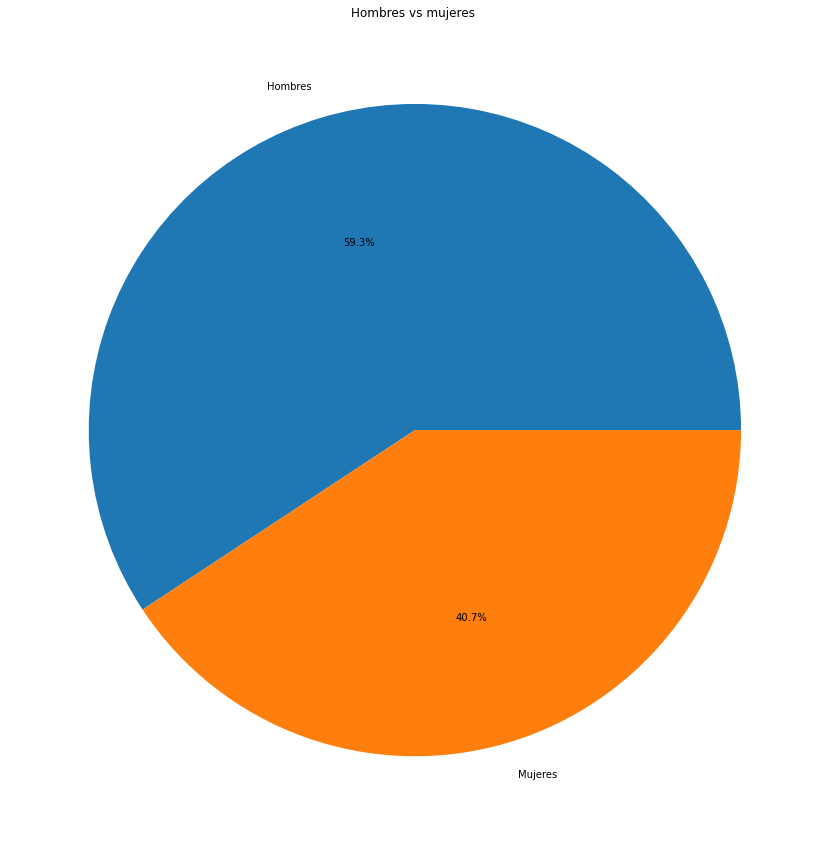

In [30]:
tot_hombres = len(df_hombres)
tot_mujeres = len(df_mujeres)
arr_pie = [tot_hombres/tot_muestra,tot_mujeres/tot_muestra]
mylabels = ['Hombres','Mujeres']

plt.figure(figsize=(15,15))
plt.title("Hombres vs mujeres ")
plt.pie(arr_pie,labels = mylabels, autopct='%1.1f%%')
plt.show()

<BarContainer object of 15 artists>

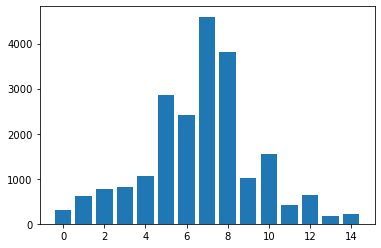

In [31]:
y = df_hombres['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 37 artists>

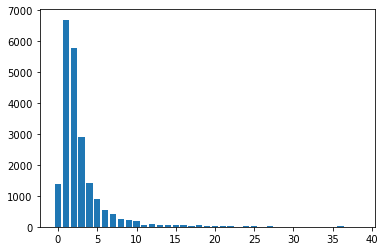

In [32]:
y = df_hombres['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 15 artists>

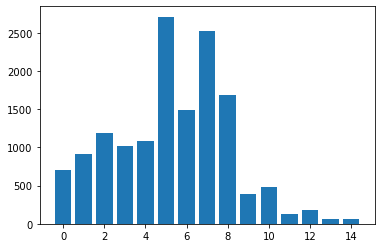

In [33]:
y = df_mujeres['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 37 artists>

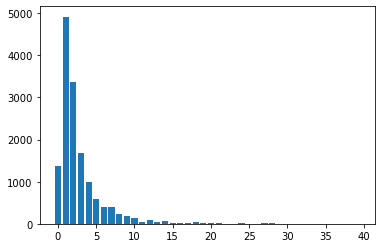

In [34]:
y = df_mujeres['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

## Formal vs informal

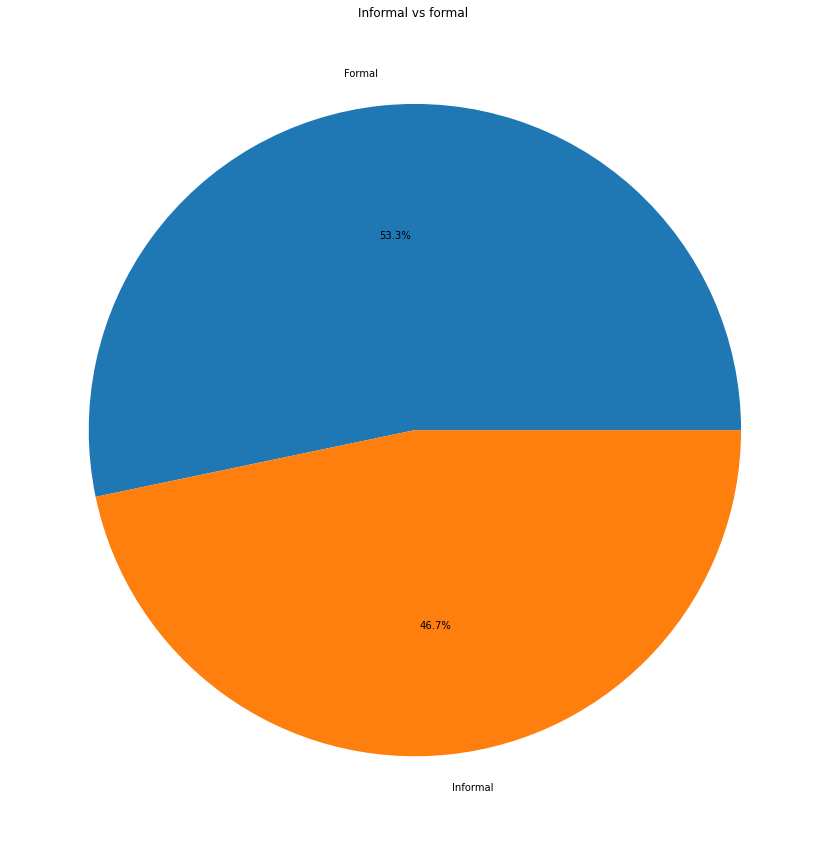

In [35]:
tot_formal = len(df_formal)
tot_informal = len(df_informal)
tot_formal_informal = tot_formal + tot_informal
arr_pie = [tot_formal/tot_formal_informal,tot_informal/tot_formal_informal]
mylabels = ['Formal','Informal']

plt.figure(figsize=(15,15))
plt.title("Informal vs formal ")
plt.pie(arr_pie,labels = mylabels, autopct='%1.1f%%')
plt.show()

<BarContainer object of 15 artists>

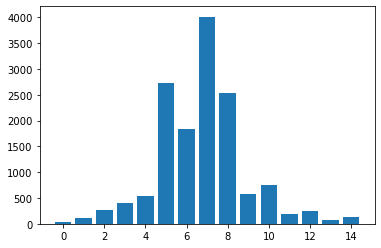

In [36]:
y = df_formal['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 36 artists>

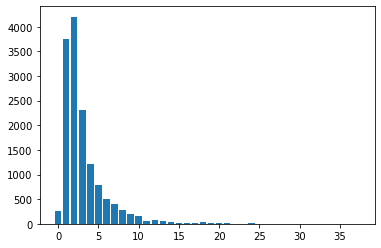

In [37]:
y = df_formal['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 15 artists>

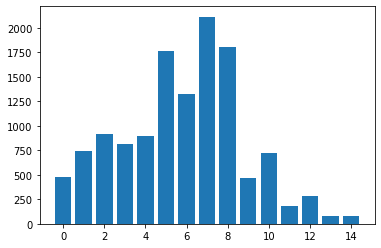

In [38]:
y = df_informal['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 33 artists>

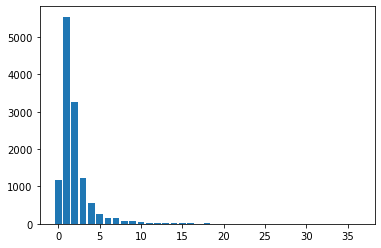

In [39]:
y = df_informal['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

# Intervalos de confianza

## Nivel educativo

In [40]:
df_nula = df_nuevo.loc[df_nuevo['NIV'] == 0]
df_basica = df_nuevo.loc[df_nuevo['NIV'] > 0]
df_basica = df_basica.loc[df_basica['NIV'] < 4]
df_media = df_nuevo.loc[df_nuevo['NIV'] > 3]
df_media = df_media.loc[df_media['NIV'] < 8]
df_superior = df_nuevo.loc[df_nuevo['NIV'] > 7]

alfa = .05
arr_horas = [df_nula['tot_horas'],df_basica['tot_horas'],df_media['tot_horas'],df_superior['tot_horas']]
arr_pago_hora = [df_nula['ganancia_hora'],df_basica['ganancia_hora'],df_media['ganancia_hora'],df_superior['ganancia_hora']]
arr_inter_horas = arrInterConfianza(intervaloDeConfVarDesc,arr_horas,alfa)
arr_inter_pago_hora = arrInterConfianza(intervaloDeConfVarDesc,arr_pago_hora,alfa)

print('Intervalo de confinza para horas trabajadas con alfa del ' + str(alfa))
print('Intervalo de confinza para horas trabajadas con educacion nula : ' + str(arr_inter_horas[0]))
print('Intervalo de confinza para horas trabajadas con educacion básica : ' + str(arr_inter_horas[1]))
print('Intervalo de confinza para horas trabajadas con educacion media : ' + str(arr_inter_horas[2]))
print('Intervalo de confinza para horas trabajadas con educacion superior : ' + str(arr_inter_horas[3]))
print('-------------------------------------------------------------------------------------')
print('Intervalo de confinza para el ingreso por hora con alfa del ' + str(alfa))
print('Intervalo de confinza para el ingreso por hora con educacion nula : ' + str(arr_inter_pago_hora[0]))
print('Intervalo de confinza para el ingreso por hora con educacion básica : ' + str(arr_inter_pago_hora[1]))
print('Intervalo de confinza para el ingreso por hora con educacion media : ' + str(arr_inter_pago_hora[2]))
print('Intervalo de confinza para el ingreso por hora con educacion superior : ' + str(arr_inter_pago_hora[3]))

Intervalo de confinza para horas trabajadas con alfa del 0.05
Intervalo de confinza para horas trabajadas con educacion nula : [40.59472478438176, 43.257222034231724]
Intervalo de confinza para horas trabajadas con educacion básica : [45.09101414914455, 45.68460685005298]
Intervalo de confinza para horas trabajadas con educacion media : [45.657908872356295, 46.434950280591515]
Intervalo de confinza para horas trabajadas con educacion superior : [43.13106092736935, 43.88867360485072]
-------------------------------------------------------------------------------------
Intervalo de confinza para el ingreso por hora con alfa del 0.05
Intervalo de confinza para el ingreso por hora con educacion nula : [27.354377642910006, 31.404589830649737]
Intervalo de confinza para el ingreso por hora con educacion básica : [37.75177208621263, 39.22968501653195]
Intervalo de confinza para el ingreso por hora con educacion media : [45.5389845160865, 47.797089153829404]
Intervalo de confinza para el ingre

In [41]:
alfa = .1
arr_inter_horas = arrInterConfianza(intervaloDeConfVarDesc,arr_horas,alfa)
arr_inter_pago_hora = arrInterConfianza(intervaloDeConfVarDesc,arr_pago_hora,alfa)

print('Intervalo de confinza para horas trabajadas con alfa del ' + str(alfa))
print('Intervalo de confinza para horas trabajadas con educacion nula : ' + str(arr_inter_horas[0]))
print('Intervalo de confinza para horas trabajadas con educacion básica : ' + str(arr_inter_horas[1]))
print('Intervalo de confinza para horas trabajadas con educacion media : ' + str(arr_inter_horas[2]))
print('Intervalo de confinza para horas trabajadas con educacion superior : ' + str(arr_inter_horas[3]))
print('-------------------------------------------------------------------------------------')
print('Intervalo de confinza para el ingreso por hora con alfa del ' + str(alfa))
print('Intervalo de confinza para el ingreso por hora con educacion nula : ' + str(arr_inter_pago_hora[0]))
print('Intervalo de confinza para el ingreso por hora con educacion básica : ' + str(arr_inter_pago_hora[1]))
print('Intervalo de confinza para el ingreso por hora con educacion media : ' + str(arr_inter_pago_hora[2]))
print('Intervalo de confinza para el ingreso por hora con educacion superior : ' + str(arr_inter_pago_hora[3]))

Intervalo de confinza para horas trabajadas con alfa del 0.1
Intervalo de confinza para horas trabajadas con educacion nula : [40.80905616426046, 43.04289065435302]
Intervalo de confinza para horas trabajadas con educacion básica : [45.13873511111906, 45.63688588807847]
Intervalo de confinza para horas trabajadas con educacion media : [45.72038249642844, 46.37247665651937]
Intervalo de confinza para horas trabajadas con educacion superior : [43.19197456439088, 43.82775996782919]
-------------------------------------------------------------------------------------
Intervalo de confinza para el ingreso por hora con alfa del 0.1
Intervalo de confinza para el ingreso por hora con educacion nula : [27.680420258371377, 31.078547215188365]
Intervalo de confinza para el ingreso por hora con educacion básica : [37.870586597646955, 39.11087050509763]
Intervalo de confinza para el ingreso por hora con educacion media : [45.720534660980725, 47.61553900893518]
Intervalo de confinza para el ingreso 

## Licenciatura vs maestria o doctorado

In [42]:
df_licenciatura = df_superior.loc[df_superior['NIV'] == 8]
df_maestria_doctorado = df_superior.loc[df_superior['NIV'] == 9]
print(len(df_maestria_doctorado))
alfa = .05
arr_horas = [df_licenciatura['tot_horas'],df_maestria_doctorado['tot_horas']]
arr_pago_hora = [df_licenciatura['ganancia_hora'],df_maestria_doctorado['ganancia_hora']]
arr_inter_horas = arrInterConfianza(intervaloDeConfVarDesc,arr_horas,alfa)
arr_inter_pago = arrInterConfianza(intervaloDeConfVarDesc,arr_pago_hora,alfa)

x = [df_licenciatura['tot_horas'],df_maestria_doctorado['tot_horas']]
dif_media_horas = intervaloDeConfDifMedias(x,alfa)

x = [df_licenciatura['ganancia_hora'],df_maestria_doctorado['ganancia_hora']]
dif_media_ganancia = intervaloDeConfDifMedias(x,alfa)

print('Intervalo de confinza para horas trabajadas con alfa del ' + str(alfa))
print('Intervalo de confinza para horas trabajadas con licenciatura : ' + str(arr_inter_horas[0]))
print('Intervalo de confinza para horas trabajadas con maestria o doctorado : ' + str(arr_inter_horas[1]))
print('Intervalo de confinza para diferencia de horas promedio trabajadas : ' + str(dif_media_horas))
print('-------------------------------------------------------------------------------------')
print('Intervalo de confinza para el ingreso por hora con alfa del ' + str(alfa))
print('Intervalo de confinza para el ingreso por hora con licenciatura : ' + str(arr_inter_pago_hora[0]))
print('Intervalo de confinza para el ingreso por hora con maestria o doctorado : ' + str(arr_inter_pago_hora[1]))
print('Intervalo de confinza para diferencia de ingreso por hora promedio : ' + str(dif_media_ganancia))

736
Intervalo de confinza para horas trabajadas con alfa del 0.05
Intervalo de confinza para horas trabajadas con licenciatura : [42.97511538781393, 43.78016904969495]
Intervalo de confinza para horas trabajadas con maestria o doctorado : [43.686060065491084, 45.8664308765379]
Intervalo de confinza para diferencia de horas promedio trabajadas : [-2.6930255107175247, -0.10418099380258039]
-------------------------------------------------------------------------------------
Intervalo de confinza para el ingreso por hora con alfa del 0.05
Intervalo de confinza para el ingreso por hora con licenciatura : [27.680420258371377, 31.078547215188365]
Intervalo de confinza para el ingreso por hora con maestria o doctorado : [37.870586597646955, 39.11087050509763]
Intervalo de confinza para diferencia de ingreso por hora promedio : [-53.78683688240884, -29.801913958705192]


In [43]:
alfa = .1
arr_horas = [df_licenciatura['tot_horas'],df_maestria_doctorado['tot_horas']]
arr_pago_hora = [df_licenciatura['ganancia_hora'],df_maestria_doctorado['ganancia_hora']]
arr_inter_horas = arrInterConfianza(intervaloDeConfVarDesc,arr_horas,alfa)
arr_inter_pago = arrInterConfianza(intervaloDeConfVarDesc,arr_pago_hora,alfa)

x = [df_licenciatura['tot_horas'],df_maestria_doctorado['tot_horas']]
dif_media_horas = intervaloDeConfDifMedias(x,alfa)
x = [df_licenciatura['ganancia_hora'],df_maestria_doctorado['ganancia_hora']]
dif_media_ganancia = intervaloDeConfDifMedias(x,alfa)

print('Intervalo de confinza para horas trabajadas con alfa del ' + str(alfa))
print('Intervalo de confinza para horas trabajadas con licenciatura : ' + str(arr_inter_horas[0]))
print('Intervalo de confinza para horas trabajadas con maestria y doctorado : ' + str(arr_inter_horas[1]))
print('Intervalo de confinza para diferencia de horas promedio trabajadas : ' + str(dif_media_horas))
print('-------------------------------------------------------------------------------------')
print('Intervalo de confinza para el ingreso por hora con alfa del ' + str(alfa))
print('Intervalo de confinza para el ingreso por hora con licenciatura : ' + str(arr_inter_pago_hora[0]))
print('Intervalo de confinza para el ingreso por hora con maestria y doctorado : ' + str(arr_inter_pago_hora[1]))
print('Intervalo de confinza para diferencia de ingreso por hora promedio : ' + str(dif_media_ganancia))

Intervalo de confinza para horas trabajadas con alfa del 0.1
Intervalo de confinza para horas trabajadas con licenciatura : [43.03984466603586, 43.715439771473015]
Intervalo de confinza para horas trabajadas con maestria y doctorado : [43.86168692306858, 45.6908040189604]
Intervalo de confinza para diferencia de horas promedio trabajadas : [-2.484877015114986, -0.31232948940511873]
-------------------------------------------------------------------------------------
Intervalo de confinza para el ingreso por hora con alfa del 0.1
Intervalo de confinza para el ingreso por hora con licenciatura : [27.680420258371377, 31.078547215188365]
Intervalo de confinza para el ingreso por hora con maestria y doctorado : [37.870586597646955, 39.11087050509763]
Intervalo de confinza para diferencia de ingreso por hora promedio : [-51.85839908280661, -31.73035175830742]


### Cociente de varianzas

In [44]:
alfa = .05
x = [df_licenciatura['tot_horas'],df_maestria_doctorado['tot_horas']]
cociente_var = intervaloDeConfCocienteDeVar(x,alfa)
print('intervalo de confianza para cociente de varianzas del total de horas trabajadas en la semana' + str(cociente_var))

print('------------------------------------------------------------------------------------------------------------')

x = [df_licenciatura['ganancia_hora'],df_maestria_doctorado['ganancia_hora']]
cociente_var = intervaloDeConfCocienteDeVar(x,alfa)
print('intervalo de confianza para cociente de varianzas entre total ingreso por hora' + str(cociente_var))

intervalo de confianza para cociente de varianzas del total de horas trabajadas en la semana[0.6874179645574369, 0.85231433669871]
------------------------------------------------------------------------------------------------------------
intervalo de confianza para cociente de varianzas entre total ingreso por hora[0.3902648032846033, 0.4838807015503544]


## Hombre vs mujeres

In [45]:
df_hombres = df_nuevo.loc[df_nuevo['SEXO'] == 1]
df_mujeres = df_nuevo.loc[df_nuevo['SEXO'] == 2]

alfa = .05
arr_horas = [df_hombres['tot_horas'],df_mujeres['tot_horas']]
arr_pago_hora = [df_hombres['ganancia_hora'],df_mujeres['ganancia_hora']]
arr_inter_horas = arrInterConfianza(intervaloDeConfVarDesc,arr_horas,alfa)
arr_inter_pago_hora = arrInterConfianza(intervaloDeConfVarDesc,arr_pago_hora,alfa)

x = [df_hombres['tot_horas'],df_mujeres['tot_horas']]
dif_media_horas = intervaloDeConfDifMedias(x,alfa)

x = [df_hombres['ganancia_hora'],df_mujeres['ganancia_hora']]
dif_media_ganancia = intervaloDeConfDifMedias(x,alfa)

print('Intervalo de confinza para horas trabajadas con alfa del ' + str(alfa))
print('Intervalo de confinza para horas trabajadas de los hombres : ' + str(arr_inter_horas[0]))
print('Intervalo de confinza para horas trabajadas de las mujeres  : ' + str(arr_inter_horas[1]))
print('Intervalo de confinza para diferencia de horas promedio trabajadas : ' + str(dif_media_horas))
print('-------------------------------------------------------------------------------------')
print('Intervalo de confinza para el ingreso por hora con alfa del ' + str(alfa))
print('Intervalo de confinza para el ingreso por hora de los hombres : ' + str(arr_inter_pago_hora[0]))
print('Intervalo de confinza para el ingreso por hora de las mujeres : ' + str(arr_inter_pago_hora[1]))
print('Intervalo de confinza para diferencia de ingreso por hora promedio : ' + str(dif_media_ganancia))

Intervalo de confinza para horas trabajadas con alfa del 0.05
Intervalo de confinza para horas trabajadas de los hombres : [48.65127484318559, 49.153767108457615]
Intervalo de confinza para horas trabajadas de las mujeres  : [39.116859790923534, 39.73045438062437]
Intervalo de confinza para diferencia de horas promedio trabajadas : [9.083017005684301, 9.874710774410996]
-------------------------------------------------------------------------------------
Intervalo de confinza para el ingreso por hora con alfa del 0.05
Intervalo de confinza para el ingreso por hora de los hombres : [48.984590876634584, 51.69204534641649]
Intervalo de confinza para el ingreso por hora de las mujeres : [48.13658547705553, 50.24698346207053]
Intervalo de confinza para diferencia de ingreso por hora promedio : [-0.7090337252620389, 3.002101009187051]


In [46]:
alfa = .1
x = [df_hombres['tot_horas'],df_mujeres['tot_horas']]
dif_media_horas = intervaloDeConfDifMedias(x,alfa)

x = [df_hombres['ganancia_hora'],df_mujeres['ganancia_hora']]
dif_media_ganancia = intervaloDeConfDifMedias(x,alfa)

print('Intervalo de confinza para horas trabajadas con alfa del ' + str(alfa))
print('Intervalo de confinza para horas trabajadas de los hombres : ' + str(arr_inter_horas[0]))
print('Intervalo de confinza para horas trabajadas de las mujeres  : ' + str(arr_inter_horas[1]))
print('Intervalo de confinza para diferencia de horas promedio trabajadas : ' + str(dif_media_horas))
print('-------------------------------------------------------------------------------------')
print('Intervalo de confinza para el ingreso por hora con alfa del ' + str(alfa))
print('Intervalo de confinza para el ingreso por hora de los hombres : ' + str(arr_inter_pago_hora[0]))
print('Intervalo de confinza para el ingreso por hora de las mujeres : ' + str(arr_inter_pago_hora[1]))
print('Intervalo de confinza para diferencia de ingreso por hora promedio : ' + str(dif_media_ganancia))

Intervalo de confinza para horas trabajadas con alfa del 0.1
Intervalo de confinza para horas trabajadas de los hombres : [48.65127484318559, 49.153767108457615]
Intervalo de confinza para horas trabajadas de las mujeres  : [39.116859790923534, 39.73045438062437]
Intervalo de confinza para diferencia de horas promedio trabajadas : [9.146661320565133, 9.811066459530164]
-------------------------------------------------------------------------------------
Intervalo de confinza para el ingreso por hora con alfa del 0.1
Intervalo de confinza para el ingreso por hora de los hombres : [48.984590876634584, 51.69204534641649]
Intervalo de confinza para el ingreso por hora de las mujeres : [48.13658547705553, 50.24698346207053]
Intervalo de confinza para diferencia de ingreso por hora promedio : [-0.41069535639455435, 2.7037626403195665]


### Cociente de varianzas

In [47]:
alfa = .1

x = [df_hombres['tot_horas'],df_mujeres['tot_horas']]
cociente_var = intervaloDeConfCocienteDeVar(x,alfa)
print('intervalo de confianza para cociente de varianzas del total de horas trabajadas en la semana' + str(cociente_var))

print('-----------------------------------------------------------------------------------------------------')

x = [df_hombres['ganancia_hora'],df_mujeres['ganancia_hora']]
cociente_var = intervaloDeConfCocienteDeVar(x,alfa)
print('intervalo de confianza para cociente de varianzas entre total ingreso por hora' + str(cociente_var))

intervalo de confianza para cociente de varianzas del total de horas trabajadas en la semana[0.9934986334393816, 1.0442432327438502]
-----------------------------------------------------------------------------------------------------
intervalo de confianza para cociente de varianzas entre total ingreso por hora[0.4048269311419479, 0.4255041416755337]


## Formal vs informal

In [48]:
df_formal = df_nuevo.loc[df_nuevo['P5_6_6'] == 1]
df_informal = df_nuevo.loc[df_nuevo['P5_6_6'] == 2]

alfa = .05
arr_horas = [df_formal['tot_horas'],df_informal['tot_horas']]
arr_pago_hora = [df_formal['ganancia_hora'],df_informal['ganancia_hora']]
arr_inter_horas = arrInterConfianza(intervaloDeConfVarDesc,arr_horas,alfa)
arr_inter_pago_hora = arrInterConfianza(intervaloDeConfVarDesc,arr_pago_hora,alfa)

x = [df_formal['tot_horas'],df_informal['tot_horas']]
dif_media_horas = intervaloDeConfDifMedias(x,alfa)

x = [df_formal['ganancia_hora'],df_informal['ganancia_hora']]
dif_media_ganancia = intervaloDeConfDifMedias(x,alfa)

print('Intervalo de confinza para horas trabajadas con alfa del ' + str(alfa))
print('Intervalo de confinza para horas trabajadas de las personas en el sector formal : ' + str(arr_inter_horas[0]))
print('Intervalo de confinza para horas trabajadas de las personas en el sector informal  : ' + str(arr_inter_horas[1]))
print('Intervalo de confinza para diferencia de horas promedio trabajadas : ' + str(dif_media_horas))
print('-------------------------------------------------------------------------------------')
print('Intervalo de confinza para el ingreso por hora con alfa del ' + str(alfa))
print('Intervalo de confinza para el ingreso por hora de las personas en el sector formal : ' + str(arr_inter_pago_hora[0]))
print('Intervalo de confinza para el ingreso por hora de las personas en el sector informal : ' + str(arr_inter_pago_hora[1]))
print('Intervalo de confinza para diferencia de ingreso por hora promedio : ' + str(dif_media_ganancia))

Intervalo de confinza para horas trabajadas con alfa del 0.05
Intervalo de confinza para horas trabajadas de las personas en el sector formal : [48.99971274424146, 49.48095634966524]
Intervalo de confinza para horas trabajadas de las personas en el sector informal  : [42.488172340509614, 43.19777798628777]
Intervalo de confinza para diferencia de horas promedio trabajadas : [5.977422935998887, 6.817295831110429]
-------------------------------------------------------------------------------------
Intervalo de confinza para el ingreso por hora con alfa del 0.05
Intervalo de confinza para el ingreso por hora de las personas en el sector formal : [53.96421317374256, 57.623335232818555]
Intervalo de confinza para el ingreso por hora de las personas en el sector informal : [36.54288391566672, 38.00781961095953]
Intervalo de confinza para diferencia de ingreso por hora promedio : [16.446883929761334, 20.589960950173527]


In [49]:
alfa = .1

arr_inter_horas = arrInterConfianza(intervaloDeConfVarDesc,arr_horas,alfa)
arr_inter_pago_hora = arrInterConfianza(intervaloDeConfVarDesc,arr_pago_hora,alfa)

x = [df_formal['tot_horas'],df_informal['tot_horas']]
dif_media_horas = intervaloDeConfDifMedias(x,alfa)

x = [df_formal['ganancia_hora'],df_informal['ganancia_hora']]
dif_media_ganancia = intervaloDeConfDifMedias(x,alfa)

print('Intervalo de confinza para horas trabajadas con alfa del ' + str(alfa))
print('Intervalo de confinza para horas trabajadas de las personas en el sector formal : ' + str(arr_inter_horas[0]))
print('Intervalo de confinza para horas trabajadas de las personas en el sector informal  : ' + str(arr_inter_horas[1]))
print('Intervalo de confinza para diferencia de horas promedio trabajadas : ' + str(dif_media_horas))
print('-------------------------------------------------------------------------------------')
print('Intervalo de confinza para el ingreso por hora con alfa del ' + str(alfa))
print('Intervalo de confinza para el ingreso por hora de las personas en el sector formal : ' + str(arr_inter_pago_hora[0]))
print('Intervalo de confinza para el ingreso por hora de las personas en el sector informal : ' + str(arr_inter_pago_hora[1]))
print('Intervalo de confinza para diferencia de ingreso por hora promedio : ' + str(dif_media_ganancia))

Intervalo de confinza para horas trabajadas con alfa del 0.1
Intervalo de confinza para horas trabajadas de las personas en el sector formal : [49.03840230430956, 49.44226678959714]
Intervalo de confinza para horas trabajadas de las personas en el sector informal  : [42.54522188098008, 43.1407284458173]
Intervalo de confinza para diferencia de horas promedio trabajadas : [6.044941272672403, 6.749777494436913]
-------------------------------------------------------------------------------------
Intervalo de confinza para el ingreso por hora con alfa del 0.1
Intervalo de confinza para el ingreso por hora de las personas en el sector formal : [54.25838814273039, 57.32916026383072]
Intervalo de confinza para el ingreso por hora de las personas en el sector informal : [36.660659061245774, 37.89004446538048]
Intervalo de confinza para diferencia de ingreso por hora promedio : [16.779950600631036, 20.256894279303825]


### Cociente de varianzas

In [50]:
alfa = .1

x = [df_formal['tot_horas'],df_informal['tot_horas']]
cociente_var = intervaloDeConfCocienteDeVar(x,alfa)
print('intervalo de confianza para cociente de varianzas del total de horas trabajadas en la semana' + str(cociente_var))

print('------------------------------------------------------------------------------------------------------------------')

x = [df_formal['ganancia_hora'],df_informal['ganancia_hora']]
cociente_var = intervaloDeConfCocienteDeVar(x,alfa)
print('intervalo de confianza para cociente de varianzas entre total ingreso por hora' + str(cociente_var))

intervalo de confianza para cociente de varianzas del total de horas trabajadas en la semana[1.8513313146405452, 1.9588158570902545]
------------------------------------------------------------------------------------------------------------------
intervalo de confianza para cociente de varianzas entre total ingreso por hora[0.13647820306213804, 0.14440185081469636]


# Graficas desv_estd - media

## Horas trabajadas promedio

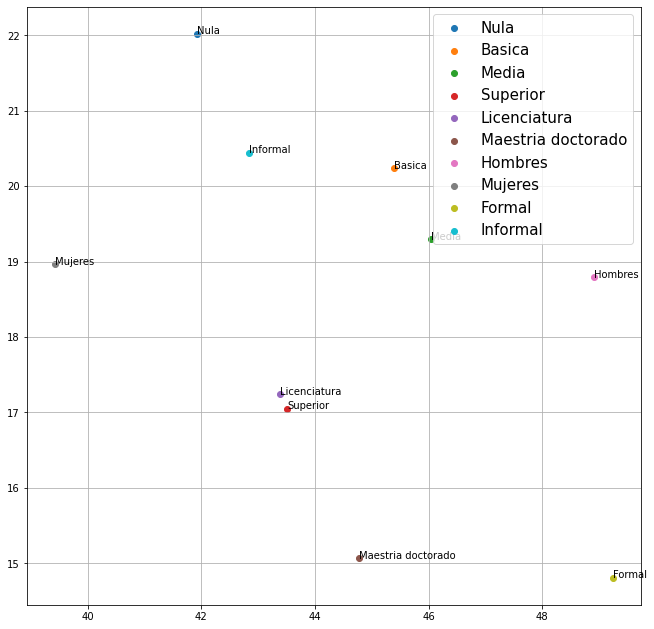

In [51]:
vec = [df_nula,df_basica,df_media,df_superior,df_licenciatura,df_maestria_doctorado,df_hombres,df_mujeres,df_formal,df_informal]

x_s2_horas = arrEstimador(s2df,vec,'tot_horas')
x_s_horas = map(pow_n,x_s2_horas)
x_s_horas = list(x_s_horas)
x_media_horas = arrEstimador(np.mean,vec,'tot_horas')

legends = ['Nula','Basica','Media','Superior','Licenciatura','Maestria doctorado','Hombres','Mujeres','Formal','Informal']
plt.figure(figsize=(11,11))
for i in range(len(x_s2_horas)):
    plt.scatter(x_media_horas[i],x_s_horas[i])
    plt.annotate(legends[i], ( x_media_horas[i],x_s_horas[i]))
plt.legend(legends, fontsize="15")
plt.grid(True)

## Ingreso por hora promedio

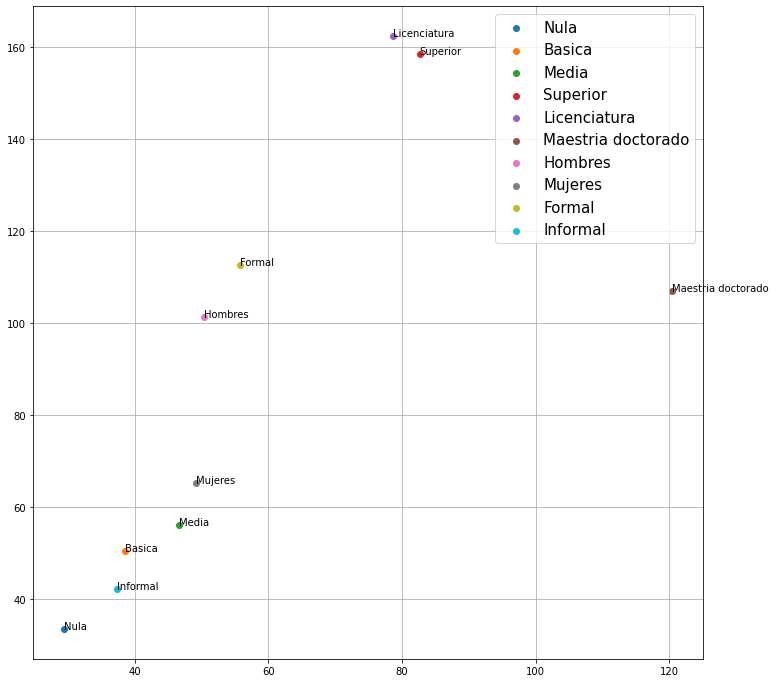

In [52]:
x_s2_ganancia = arrEstimador(s2df,vec,'ganancia_hora')
x_s_ganancia = map(pow_n,x_s2_ganancia)
x_s_ganancia = list(x_s_ganancia)
x_media_ganancia = arrEstimador(np.mean,vec,'ganancia_hora')

legends = ['Nula','Basica','Media','Superior','Licenciatura','Maestria doctorado','Hombres','Mujeres','Formal','Informal']
plt.figure(figsize=(12,12))
for i in range(len(x_s2_horas)):
    plt.scatter(x_media_ganancia[i],x_s_ganancia[i],label = legends[i])
    plt.annotate(legends[i], ( x_media_ganancia[i],x_s_ganancia[i]))
plt.legend(legends, fontsize="15")
plt.grid(True)

# Pruebas de hipotesis

In [53]:
media_pob_tot_horas = np.mean(df_nuevo['tot_horas'])
media_pob_ganancia_hora = np.mean(df_nuevo['ganancia_hora'])

# Nivel educativo

### Probar si las personas por nivel educativo trabajan más que el promedio muestral

In [54]:
alfa = 0.001
h0 = media_pob_tot_horas

res = pruebaDeHipotesisSuperior(h0,df_nula['tot_horas'],alfa)

print('valor del punto crítico: ' + str(res[0]))
print('medias: ' + str(res[1]))
aceptar_o_rechazar_h0(res[2],alfa)

valor del punto crítico: 47.15722931669567
medias: 41.92597340930674
No hay evidencia suficiente para rechazar h0, con una confiabilidad del 0.999


In [55]:
alfa = 0.001
h0 = media_pob_tot_horas

res = pruebaDeHipotesisSuperior(h0,df_basica['tot_horas'],alfa)

print('valor del punto crítico: ' + str(res[0]))
print('medias: ' + str(res[1]))
aceptar_o_rechazar_h0(res[2],alfa)

valor del punto crítico: 45.52341518041489
medias: 45.387810499598764
No hay evidencia suficiente para rechazar h0, con una confiabilidad del 0.999


In [56]:
alfa = 0.001
h0 = media_pob_tot_horas

res = pruebaDeHipotesisSuperior(h0,df_media['tot_horas'],alfa)

print('valor del punto crítico: ' + str(res[0]))
print('medias: ' + str(res[1]))
aceptar_o_rechazar_h0(res[2],alfa)

valor del punto crítico: 45.66808984721889
medias: 46.046429576473905
Hay evidencia suficiente para rechazar h0, con una confiabilidad del 0.999


In [57]:
alfa = 0.001
h0 = media_pob_tot_horas

res = pruebaDeHipotesisSuperior(h0,df_superior['tot_horas'],alfa)

print('valor del punto crítico: ' + str(res[0]))
print('medias: ' + str(res[1]))
aceptar_o_rechazar_h0(res[2],alfa)

valor del punto crítico: 45.65279066415545
medias: 43.509867266110035
No hay evidencia suficiente para rechazar h0, con una confiabilidad del 0.999


### Probar si las personas por nivel educativo ganan más por hora que el promedio muestral

In [58]:
alfa = 0.001
h0 = media_pob_ganancia_hora

res = pruebaDeHipotesisSuperior(h0,df_nula['tot_horas'],alfa)

print('valor del punto crítico: ' + str(res[0]))
print('medias: ' + str(res[1]))
aceptar_o_rechazar_h0(res[2],alfa)

valor del punto crítico: 51.97478934673011
medias: 41.92597340930674
No hay evidencia suficiente para rechazar h0, con una confiabilidad del 0.999


In [59]:
alfa = 0.001
h0 = media_pob_ganancia_hora

res = pruebaDeHipotesisSuperior(h0,df_basica['tot_horas'],alfa)

print('valor del punto crítico: ' + str(res[0]))
print('medias: ' + str(res[1]))
aceptar_o_rechazar_h0(res[2],alfa)

valor del punto crítico: 50.34097521044933
medias: 45.387810499598764
No hay evidencia suficiente para rechazar h0, con una confiabilidad del 0.999


In [60]:
alfa = 0.001
h0 = media_pob_ganancia_hora

res = pruebaDeHipotesisSuperior(h0,df_media['tot_horas'],alfa)

print('valor del punto crítico: ' + str(res[0]))
print('medias: ' + str(res[1]))
aceptar_o_rechazar_h0(res[2],alfa)

valor del punto crítico: 50.48564987725333
medias: 46.046429576473905
No hay evidencia suficiente para rechazar h0, con una confiabilidad del 0.999


In [61]:
alfa = 0.001
h0 = media_pob_ganancia_hora

res = pruebaDeHipotesisSuperior(h0,df_superior['tot_horas'],alfa)

print('valor del punto crítico: ' + str(res[0]))
print('medias: ' + str(res[1]))
aceptar_o_rechazar_h0(res[2],alfa)

valor del punto crítico: 50.47035069418989
medias: 43.509867266110035
No hay evidencia suficiente para rechazar h0, con una confiabilidad del 0.999


# Licenciatura vs maestria doctorado

### Probar si las personas con licenciatura trabajan más que el promedio muestral

In [62]:
alfa = 0.001
h0 = media_pob_tot_horas

res = pruebaDeHipotesisSuperior(h0,df_licenciatura['tot_horas'],alfa)

print('valor del punto crítico: ' + str(res[0]))
print('medias: ' + str(res[1]))
aceptar_o_rechazar_h0(res[2],alfa)

valor del punto crítico: 45.690209260643975
medias: 43.37764221875444
No hay evidencia suficiente para rechazar h0, con una confiabilidad del 0.999


### Probar si las personas con maestria o doctorado trabajan más que el promedio muestral

In [63]:
alfa = 0.001
h0 = media_pob_tot_horas

res = pruebaDeHipotesisSuperior(h0,df_maestria_doctorado['tot_horas'],alfa)

print('valor del punto crítico: ' + str(res[0]))
print('medias: ' + str(res[1]))
aceptar_o_rechazar_h0(res[2],alfa)

valor del punto crítico: 46.777644385786594
medias: 44.77624547101449
No hay evidencia suficiente para rechazar h0, con una confiabilidad del 0.999


### Probar si las personas con licenciatura ganan más por hora que el promedio muestral

In [64]:
alfa = 0.001
h0 = media_pob_ganancia_hora

res = pruebaDeHipotesisSuperior(h0,df_licenciatura['tot_horas'],alfa)

print('valor del punto crítico: ' + str(res[0]))
print('medias: ' + str(res[1]))
aceptar_o_rechazar_h0(res[2],alfa)

valor del punto crítico: 50.50776929067842
medias: 43.37764221875444
No hay evidencia suficiente para rechazar h0, con una confiabilidad del 0.999


### Probar si las personas con maestria o doctorado ganan más por hora que el promedio muestral

In [65]:
alfa = 0.001
h0 = media_pob_ganancia_hora

res = pruebaDeHipotesisSuperior(h0,df_maestria_doctorado['tot_horas'],alfa)

print('valor del punto crítico: ' + str(res[0]))
print('medias: ' + str(res[1]))
aceptar_o_rechazar_h0(res[2],alfa)

valor del punto crítico: 51.59520441582104
medias: 44.77624547101449
No hay evidencia suficiente para rechazar h0, con una confiabilidad del 0.999


### Probar si el salario por hora de las personas con licenciatura es igual al de las personas con maestria o doctorado

In [66]:
alfa = 0.001
h0 = 0

arr_pago_hora = [df_licenciatura['ganancia_hora'],df_maestria_doctorado['ganancia_hora']]
res = pruebaDeHipotesisDifMediaInferior(h0,arr_pago_hora,alfa)

print('valor del punto crítico: ' + str(res[0]))
print('diferencia de medias: ' + str(res[1]))
aceptar_o_rechazar_h0(res[2],alfa)

valor del punto crítico: -21.003408279628715
diferencia de medias: -41.79437542055702
Hay evidencia suficiente para rechazar h0, con una confiabilidad del 0.999


## Hombres vs mujeres

### Probar si los hombres trabajan más horas que el promedio muestral

In [67]:
alfa = 0.001
h0 = media_pob_tot_horas

res = pruebaDeHipotesisSuperior(h0,df_hombres['tot_horas'],alfa)

print('valor del punto crítico: ' + str(res[0]))
print('medias: ' + str(res[1]))
aceptar_o_rechazar_h0(res[2],alfa)

valor del punto crítico: 45.45158606010556
medias: 48.9025209758216
Hay evidencia suficiente para rechazar h0, con una confiabilidad del 0.999


### Probar si las mujeres trabajan más horas que el promedio muestral

In [68]:
alfa = 0.001
h0 = media_pob_tot_horas

res = pruebaDeHipotesisSuperior(h0,df_mujeres['tot_horas'],alfa)

print('valor del punto crítico: ' + str(res[0]))
print('medias: ' + str(res[1]))
aceptar_o_rechazar_h0(res[2],alfa)

valor del punto crítico: 45.53919308196303
medias: 39.423657085773954
No hay evidencia suficiente para rechazar h0, con una confiabilidad del 0.999


### Probar si los hombres ganan más por hora que el promedio muestral

In [69]:
alfa = 0.001
h0 = media_pob_ganancia_hora

res = pruebaDeHipotesisSuperior(h0,df_hombres['tot_horas'],alfa)

print('valor del punto crítico: ' + str(res[0]))
print('medias: ' + str(res[1]))
aceptar_o_rechazar_h0(res[2],alfa)

valor del punto crítico: 50.269146090140005
medias: 48.9025209758216
No hay evidencia suficiente para rechazar h0, con una confiabilidad del 0.999


### Probar si las mujeres ganan más por hora que el promedio muestral

In [70]:
alfa = 0.001
h0 = media_pob_ganancia_hora

res = pruebaDeHipotesisSuperior(h0,df_mujeres['tot_horas'],alfa)

print('valor del punto crítico: ' + str(res[0]))
print('medias: ' + str(res[1]))
aceptar_o_rechazar_h0(res[2],alfa)

valor del punto crítico: 50.35675311199747
medias: 39.423657085773954
No hay evidencia suficiente para rechazar h0, con una confiabilidad del 0.999


Probar si el salario promedio de los hombres por hora es igual que el salario promedio por hora de las mujeres \
h0: media_ingreso_hora_hombres = media_ingreso_hora_mujeres \
ha: media_ingreso_hora_hombres > media_ingreso_hora_mujeres

In [71]:
alfa = 0.001
h0 = 0

arr_pago_hora = [df_hombres['ganancia_hora'],df_mujeres['ganancia_hora']]
res = pruebaDeHipotesisDifMediaSuperior(h0,arr_pago_hora,alfa)

print('valor del punto crítico: ' + str(res[0]))
print('diferencia de medias: ' + str(res[1]))
aceptar_o_rechazar_h0(res[2],alfa)

valor del punto crítico: 6.745654205196789
diferencia de medias: 1.146533641962506
No hay evidencia suficiente para rechazar h0, con una confiabilidad del 0.999


Probar si las horas trabajadas en promedio de los hombres es igual a las hora trabajadas de las mujeres \
h0: media_horas_hombres = media_horas_mujeres \
ha: media_horas_hombres > media_horas_mujeres

In [72]:
alfa = 0.001
h0 = 0

arr_horas = [df_hombres['tot_horas'],df_mujeres['tot_horas']]
res = pruebaDeHipotesisDifMediaSuperior(h0,arr_horas,alfa)

print('valor del punto crítico: ' + str(res[0]))
print('diferencia de medias: ' + str(res[1]))
aceptar_o_rechazar_h0(res[2],alfa)

valor del punto crítico: 1.4390456780416823
diferencia de medias: 9.478863890047649
Hay evidencia suficiente para rechazar h0, con una confiabilidad del 0.999


Probar si las horas trabajadas en promedio de los hombres es 9 horas mayor que  de las mujeres \
h0: media_horas_hombres - media_horas_mujeres = 9 \
ha: media_horas_hombres - media_horas_mujeres < 9

In [73]:
alfa = 0.001
h0 = 9

arr_horas = [df_hombres['tot_horas'],df_mujeres['tot_horas']]
res = pruebaDeHipotesisDifMediaSuperior(h0,arr_horas,alfa)

print('valor del punto crítico: ' + str(res[0]))
print('diferencia de medias: ' + str(res[1]))
aceptar_o_rechazar_h0(res[2],alfa)

valor del punto crítico: 10.439045678041682
diferencia de medias: 9.478863890047649
No hay evidencia suficiente para rechazar h0, con una confiabilidad del 0.999


### Beta vs Potencia de la prueba

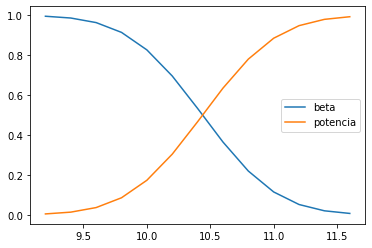

In [74]:
ha = [9.2,9.4,9.6,9.8,10,10.20,10.40,10.60,10.80,11,11.2,11.4,11.6]
b = []
p = []
for x in ha:
    r = beta(arr_horas,res[0],x)
    b.append(r)
    p.append(1-r)
plt.plot(ha,b,label = "beta")
plt.plot(ha,p,label = "potencia")
plt.legend()
plt.show()

## Formal vs informal

In [75]:
alfa = 0.001
h0 = media_pob_tot_horas

res = pruebaDeHipotesisSuperior(h0,df_formal['tot_horas'],alfa)

print('valor del punto crítico: ' + str(res[0]))
print('medias: ' + str(res[1]))
aceptar_o_rechazar_h0(res[2],alfa)

valor del punto crítico: 45.434845805686734
medias: 49.24033454695335
Hay evidencia suficiente para rechazar h0, con una confiabilidad del 0.999


In [76]:
alfa = 0.001
h0 = media_pob_tot_horas

res = pruebaDeHipotesisSuperior(h0,df_informal['tot_horas'],alfa)

print('valor del punto crítico: ' + str(res[0]))
print('medias: ' + str(res[1]))
aceptar_o_rechazar_h0(res[2],alfa)

valor del punto crítico: 45.614897948189316
medias: 42.84297516339869
No hay evidencia suficiente para rechazar h0, con una confiabilidad del 0.999
